## Importing files

In [58]:
#Importing the files to get data.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

'''Numpy for numerical computation, matplotlib.pyplot for plot and identify the plot points, sklearn to import
the logistic regression algorithm for probabilty prediction of points, make_blobs for creating synthetic 
datasets(artificially), train_test_split to modify the dataset into traning data and test dataset, accuracy_score to 
accurately predict the samples from a given total number of samples
'''

'Numpy for numerical computation, matplotlib.pyplot for plot and identify the plot points, sklearn to import\nthe logistic regression algorithm for probabilty prediction of points, make_blobs for creating synthetic \ndatasets(artificially), train_test_split to modify the dataset into traning data and test dataset, accuracy_score to \naccurately predict the samples from a given total number of samples\n'

## Creating the dataset

In [59]:
# Generating the dataset
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3, random_state=42)
# generating a random dataset with 100 datapoints, each point has 2 features, plotted with the 2D plot, and 2 centres i.e. 
# the dataset will be clustered around two centres, split into two parts, cluster_std defines how dense or sparse a cluster 
# Has to be varied, random state defines at a particular instant the number of data values to generate each time we call 
# the function, thus creating a same number of data points to improve reusability and data generation easy

## Plotting the data set

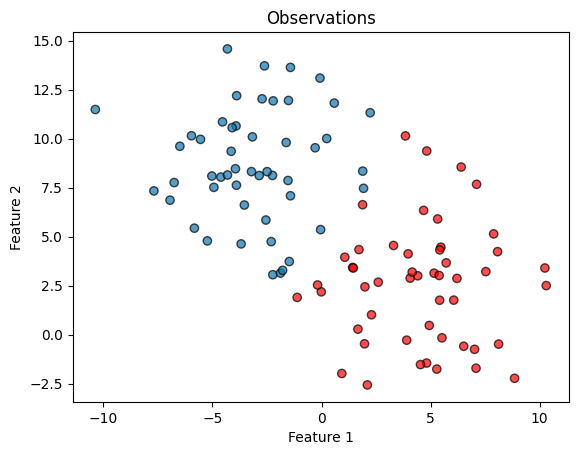

In [60]:
# Plotting the data set


colors = np.array(['#0f77b4', '#FF0000'])
plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors[y], edgecolor='k',alpha=0.7)

#Plots a scatter plot with X[:, 0], X[:, 1] defining the coordinate axis of the plots with the two features,
#marker as per the matplotlib library, assigned colours from numpy array, and given the edge colour as black with a
# transparency of 0.7 so if a point overlaps partially we can identify that there are more than one data plots.

# Defining labels for clarity
plt.xlabel('Feature 1') # label for x axis
plt.ylabel('Feature 2') #label for Y axis.
plt.title('Observations') # Title for the plot
plt.show() #view the details of scattterplot.


## Fitting the logistic regression model.

In [61]:
# Fitting the logistic regression model on the dataset

logreg = LogisticRegression()
logreg.fit(X, y)

# .fit() method implements the model to the dataset.

LogisticRegression()

## Creating grid.

In [62]:
# as to determine the maximum area of error possibility, a decision boundary has to be introducted in the model, it gives 
# an area of consideration into which there are a high chances of model to make errors typically the probability 
# lies around 0.5 so the prediction can move towards either cluster. We have to decide which points on the active learning
# terms we have to select within this decision boundary to accurately identify the unlabelled data points.

x1 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100) 

#np.linspace is used to generate linearly spaced values, with which we can determine the decision boundary,
#X[:, 0].min()-1 this concerns upon the lowest feature value over the x coordinate and subtracting 1 for extending
# boundary slightly negative for a better range classification and visualization.

# similarly X[:, 0].max()+1 helps to extract the linear space values towards a positive end for the last feature 1 value.

# 100 specifies the number of equally generated values that can be generated within the range.

x2 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
# variable x2  holds the minimum and maximum values for feature 2 samples over the y axis. 

xx1, xx2 = np.meshgrid(x1, x2)
# this function is taking two 1D arrays and produces two 2D arrays, taking linearly spaced values from x1, and x2
#xx1 and xx2 are output grids with xx1 containing the values of x1 repeated row wise and xx2 containing the values of x2 re
# repeating column wise.

# 1 2 3 4 5
# 2
# 3
# 4
# 5

''' xx1 = [1 2 3 4 5]
        [1 2 3 4 5]
        [1 2 3 4 5]
        [1 2 3 4 5]
        [1 2 3 4 5]...'''

'''xx2 = [1 1 1 1 1]
         [2 2 2 2 2]
         [3 3 3 3 3]
         [4 4 4 4 4]
         [5 5 5 5 5]...'''

X_grid = np.c_[xx1.ravel(), xx2.ravel()]
#xx1.ravel() function flatten the 2D arrays into 1D arrays.Combines values from a 2D array to represent it in a 1D array.

'''On flattening xx1 = 1 2 3 4 5 1 2 3 4 5 1 2 3 4 5...'''
'''On flattenig xx2 = 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4 5 5 5 5 5...'''


# np.c_ This is a NumPy function that concatenates the flattened arrays column-wise, creating a 2-D array where each row 
#is a coordinate pair (x1, x2) from the grid.
# X_grid contains all the modified points.

''' xx1      xx2
    1        1
    1        2
    1        3
    1        4
    1        5
    2        1
    2        2
    2        3
    2        4
    2        5...'''
    

y_pred = logreg.predict(X_grid).reshape(xx1.shape)
# the function uses the already trained model to predict the new points on the X_grid. Then  prdictions are reshaped
#in a 2D format to match the shape of the grid, to be aligned with the coordiantes of xx1 and xx2.

## Data values with grid points

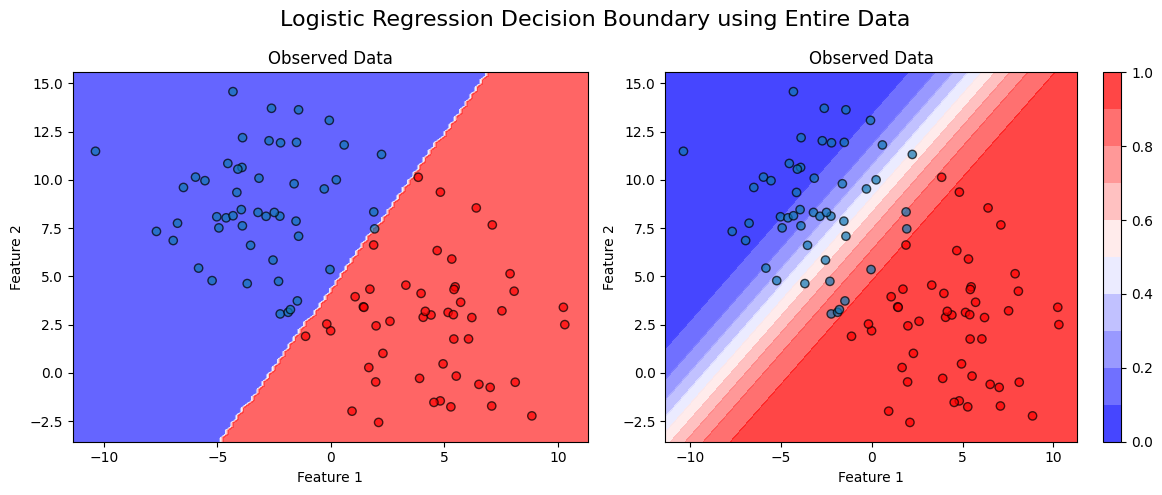

In [88]:
# plotting the data values with grid points.

plt.figure(figsize=(12, 5)) #plotting a 12*5 in plot 

plt.subplot(1, 2, 1) #plotting the subplot with 1 row and 2 columns at index 1.

plt.contourf(xx1, xx2, y_pred, cmap='bwr', alpha=0.7) #used to create a filled colourmap, and identify the decision boundary
# with xx1, xx2 - grid coordiantes, y_pred containing the predicted class of grid points,color map to distinguish the 
#cluster area, and transparency value.

plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors[y], edgecolor='k',alpha=0.7)
# plotting the data points to observe.

# Labelling and details
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observed Data')


plt.subplot(1, 2, 2) # subplot at index 2 

y_prob = logreg.predict_proba(X_grid)[:, 1].reshape(xx1.shape) 
# This is used to predict the class of each given point 
#on the basis of pre trained grid points with 1 as positive probability.And reshaped to maintain the values along with 
#the grid.

plt.contourf(xx1, xx2, y_prob, cmap='bwr', alpha=0.8, vmin=0, vmax=1, levels=10)
#plotting the contour plot with calculated probabilities of each data point as predicted by y_prob,
#vmin and vmax to give a transition of decision boundary, ensuring the colours map to probabilities between 0 and 1.


plt.colorbar()
# used to reference and decide the probability range of the data points.
# The probability range from 0.4 to 0.6 is in a decision discrepancy range.We have to gather more information from the
# training values to accurately predict the class of the point lying within the range.This is range of decision boundary.

plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors[y], edgecolor='k',alpha=0.7) # plotting the scatter plot 

# Details for the plot.
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Observed Data')

plt.suptitle('Logistic Regression Decision Boundary using Entire Data', fontsize=16)
plt.tight_layout()
plt.show()

## Predicting the accuracy with trained model.

In [68]:
print("Accuracy using the whole dataset : ",accuracy_score(y, logreg.predict(X)))

Accuracy using the whole dataset :  0.88


# Active learning 

#### Active learning iteratively selects the most informative points from a pool of unlabelled datasets, which are 
#### Here we check data points closer in the probability range of 0.5(need to determine acquired data points accurately). Hence we can identify an accurate result using limited labelled data values.

## Splitting the data set into train and pool data.

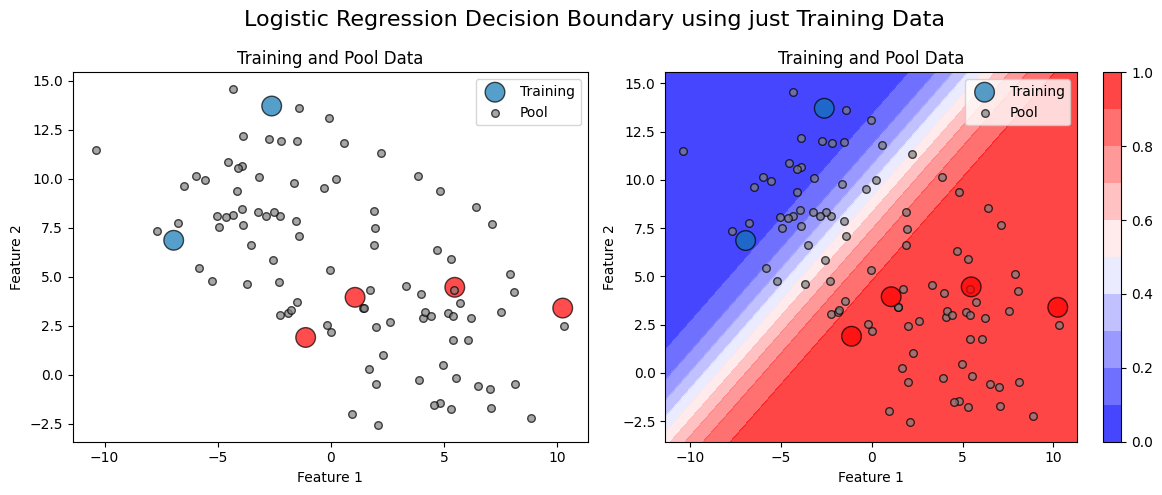

In [84]:
# creating two set of points Training and pool
#train_test_split method assigns the data into train and test set.
X_train, X_pool, y_train, y_pool = train_test_split(X, y, train_size=0.06, random_state=420)

# X represents the feature matrix, y represents the target vector,have to determine y from X.
#training points are 6 % of the pool dataset.
# for active learning scenarios, selecting a small data set to 6 points
# X_train = feature matrix of training set
# X_pool = feature matrix of the remaining data points.
# y_train = Target vector of training set, the 6 training points.
# y_pool = Target vector for the pool set.

# plotting the training and pool data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c= colors[y_train],label='Training',s=200,edgecolors='k',alpha=0.7)
# scatterplot of the training data set. X_train[:, 0] = x coordinates of training data points
# X_train[:, 1] = y coordiantes of the training data points.

plt.scatter(X_pool[:, 0], X_pool[:, 1], marker='o', c='gray', edgecolor='k',alpha=0.7,s=30,label='Pool')
# pool data points are marked as gray.

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Pool Data')

plt.legend() #plotiting out the ledgend to identify train and pool points.


logreg = LogisticRegression()
logreg.fit(X_train, y_train)
# Training the model according to the train data set.

x1 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)

# created the grid as per the train data points.

xx1, xx2 = np.meshgrid(x1, x2)
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_prob = logreg.predict_proba(X_grid)[:, 1].reshape(xx1.shape)

#Training and pool data with logistic regression, decision boundary. Predicted outcome.
plt.subplot(1, 2, 2)
plt.contourf(xx1, xx2, y_prob, cmap='bwr', alpha=0.8, levels=10)
plt.colorbar()
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c= colors[y_train],label='Training', 
            edgecolor='k',s=200 # size of training data set.
            ,alpha=0.7,zorder=2)
#X_train[:, 0] = x coordinates of training data points
#X_train[:, 1] = y coordiantes of the training data points.

plt.scatter(X_pool[:, 0], X_pool[:, 1], marker='o', c='gray',alpha=0.7,s=30 #size of gray pool point 
            ,label='Pool', edgecolor='k',zorder=1)
# zorder = the order in which points are plotted, such that the contour plot appear below the train and pool dataset.

# Plot lables.
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Pool Data')

plt.suptitle('Logistic Regression Decision Boundary using just Training Data', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

In [70]:
print("Accuracy using the training dataset : ", accuracy_score(y, logreg.predict(X)))

Accuracy using the training dataset :  0.88


## Active Learning loop with Logistic Regression

In [75]:
# looping the procedure to train a few more points on close related functions with high error probability.Close to 0.5

X_train, X_pool, y_train, y_pool = train_test_split(X, y, train_size=0.06, random_state=420)
# splitting random data as train and test.

X_init = X_train #X_init will contain initial data points as X_train
y_init = y_train # y_init will contain initialy same data points as y_train
query_x = [] # empty list to store future predicted values of vectors.
query_y = [] # empty list to store future predicted list of labels.

for m in range(11):
    #for loop to iterate
    # Train using the training data
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)

    # figure out most uncertain point
    
    y_prob = logreg.predict_proba(X_pool)[:, 1] 
    # predicts probabilities of classes of each point of pool data. )[:, 1] denotes probability of positive class.
    
    uncertainty = np.abs(y_prob - 0.5) #calculates the absolute value of each probability point. How far the point is from
    # 0.5, as that is an indicator of maximum uncertainity. lower the values higher is uncertainity.
    
    query_idx = np.argmin(uncertainty) #finds the index of most uncertain(smallest value, uncertainity)
    
    query_x.append(X_pool[query_idx]) # appends the feature vector of most uncertain sample to list
    query_y.append(y_pool[query_idx]) # appends the label of most uncertain(probability closest to 0.5) sample to list.

    # updating the training and pool data
    X_train = np.vstack((X_train, X_pool[query_idx]))
    # it stacks the current trainig set, and currently acquired set vertically.Gets updated in X_train feature dataset.
    
    y_train = np.append(y_train, y_pool[query_idx])
    #appends the labels of the current queried pool to the existing labels, y_train updates the current set to 
    #include the current data points
    
    X_pool = np.delete(X_pool, query_idx, axis=0) #deletes the current feature set form the pool.
    y_pool = np.delete(y_pool, query_idx) #deletes the queried sample label from the dataset.

    acc = accuracy_score(y, logreg.predict(X))
    print("Accuracy at iteration {} : {}".format(m,acc))
    # calculating accuracy score for each iteration and printing result

Accuracy at iteration 0 : 0.88
Accuracy at iteration 1 : 0.9
Accuracy at iteration 2 : 0.91
Accuracy at iteration 3 : 0.93
Accuracy at iteration 4 : 0.93
Accuracy at iteration 5 : 0.99
Accuracy at iteration 6 : 0.98
Accuracy at iteration 7 : 0.99
Accuracy at iteration 8 : 0.99
Accuracy at iteration 9 : 0.99
Accuracy at iteration 10 : 0.99


## Plotting the decision boundary

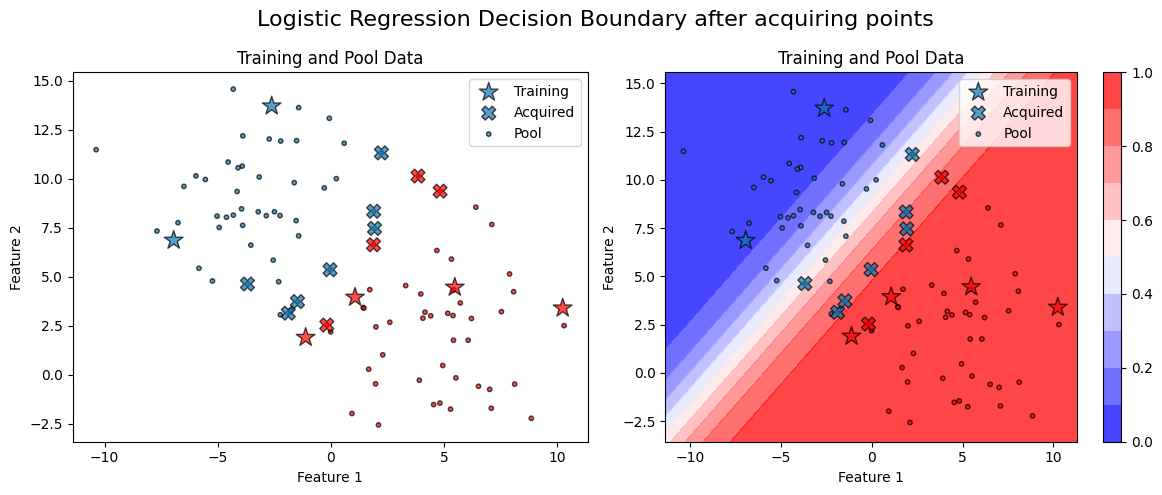

In [89]:
query_x = np.array(query_x) #converts query x into the Numpy array
query_y = np.array(query_y) # converts query_y into numpy array.

# Plotting the decision boundary

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # Plot and first subplot.

plt.scatter(X_init[:, 0], X_init[:, 1], marker='*', c = colors[y_init], label='Training',s=200,
            edgecolors='k',alpha=0.7,zorder=2)
#X_init[:, 0], X_init[:, 1] = plots the initial training data points. marker is used as a star to mention the train data 
# assigning colors as per y_init values of train set.Labelled as training(6 initial training pts). 
#marker size is 200, edge colour is black.

plt.scatter(query_x[:, 0], query_x[:, 1], marker='X', c=colors[query_y],label='Acquired',s=100,
            edgecolors='k',alpha=0.7,zorder=2)
#plots acquired data points and marked them as "X",colors points based on the labels query_y, size(marker) = 100 

plt.scatter(X_pool[:, 0], X_pool[:, 1], marker='o', c=colors[y_pool], 
            edgecolor='k',alpha=0.7,s=10, label='Pool')
#Plots the pool data points and mark them as small circles.

# Label Data Points.
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Pool Data')
plt.legend()


#Fits the model to corresponding training data(X_train) and labels(y_train).
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# setting up decision boundary as explained above 
x1 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
xx1, xx2 = np.meshgrid(x1, x2)
X_grid = np.c_[xx1.ravel(), xx2.ravel()]
y_prob = logreg.predict_proba(X_grid)[:, 1].reshape(xx1.shape)

#Plotting the second subplot with predicted acquired and labelled dataset.
plt.subplot(1, 2, 2)
plt.contourf(xx1, xx2, y_prob, cmap='bwr', alpha=0.8, levels=10)
plt.colorbar()
plt.scatter(X_init[:, 0], X_init[:, 1], marker='*', c=colors[y_init],label='Training',s=200,
            edgecolors='k',alpha=0.7,zorder=2)
plt.scatter(query_x[:, 0], query_x[:, 1], marker='X', c=colors[query_y],label='Acquired',s=100,
            edgecolors='k',alpha=0.7,zorder=2)
plt.scatter(X_pool[:, 0], X_pool[:, 1], marker='o', c=colors[y_pool],alpha=0.7,s=10,label='Pool', 
            edgecolor='k')

#Plotting and labelling data.

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training and Pool Data')
plt.suptitle('Logistic Regression Decision Boundary after acquiring points', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

## Comparison with random query

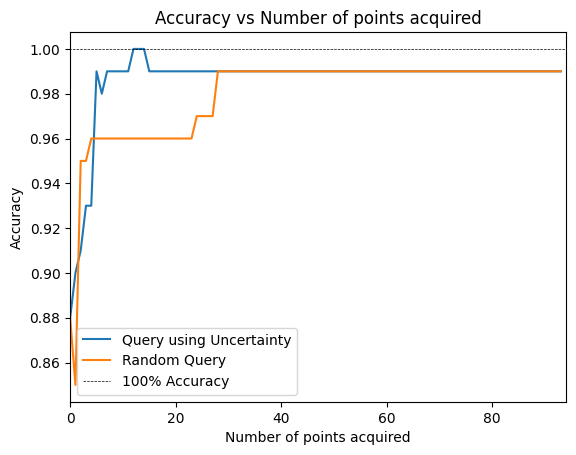

In [90]:
# running active learning loop simultaneously with random acquisition
X_train, X_pool, y_train, y_pool = train_test_split(X, y, train_size=0.06, random_state=420) #splitting data into train
#and test.

# Copy the initial train and pool datasets for active and random learning
X_train_active,y_train_active=X_train,y_train
X_train_random,y_train_random=X_train,y_train
X_pool_active,y_pool_active=X_pool,y_pool
X_pool_random,y_pool_random=X_pool,y_pool

# Initialize lists to store accuracy scores
acc_active=[]
acc_random=[]

# Active learning loop

for iter in range(len(X_pool)):
    # # Train logistic regression model using active training data
    logreg = LogisticRegression()
    logreg.fit(X_train_active, y_train_active)

    # figure out most uncertain point
    # Calculating the uncertainty for each point in the pool
    y_prob = logreg.predict_proba(X_pool_active)[:, 1]
    uncertainty = np.abs(y_prob - 0.5)
    query_idx = np.argmin(uncertainty)

    
    # updating the training and pool data
    X_train_active = np.vstack((X_train_active, X_pool_active[query_idx]))
    y_train_active = np.append(y_train_active, y_pool_active[query_idx])
    X_pool_active = np.delete(X_pool_active, query_idx, axis=0)
    y_pool_active = np.delete(y_pool_active, query_idx)

    # Calculate and store the accuracy of the active learning model
    acc_active.append(accuracy_score(y, logreg.predict(X)))

    # Train using the Random training data
    logreg = LogisticRegression()
    logreg.fit(X_train_random, y_train_random)

    # figure out most uncertain point by randomly selecting a point from the pool
    query_idx = np.random.randint(0,len(X_pool_random))

    # updating the training and pool data
    X_train_random = np.vstack((X_train_random, X_pool_random[query_idx]))
    y_train_random = np.append(y_train_random, y_pool_random[query_idx])
    X_pool_random = np.delete(X_pool_random, query_idx, axis=0)
    y_pool_random = np.delete(y_pool_random, query_idx)
    
    #Calculate and store the accuracy of random learning model
    acc_random.append(accuracy_score(y, logreg.predict(X)))
    
# Plot the accuracy of both active and random learning methods
plt.plot(acc_active,label='Query using Uncertainty')
plt.plot(acc_random,label='Random Query')
plt.xlabel('Number of points acquired')
plt.hlines(1.0,-1,len(X_pool)+1,linestyles='dashed',label='100% Accuracy',colors='k',linewidth=0.5)
plt.xlim(0,len(X_pool))
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of points acquired')
plt.legend()
plt.show()